<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Algorithms/KMeansV3(k%3D14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def sil_scores(X, range_n_clusters ):
    result = []
    for n_clusters in range_n_clusters:
    #     X=data
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init=20, max_iter=500)
        cluster_labels = clusterer.fit_predict(X)



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        result.append(silhouette_avg)
    return result

def silhouette_plotter(X, range_n_clusters, tsne_X ):
    all_scores = []
    for n_clusters in range_n_clusters:
    #     X=data
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        all_scores.append(silhouette_avg)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)


        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / 8)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / 8)
        ax2.scatter(tsne_X[:, 0], tsne_X[:, 1], marker='.', s=30, lw=0, alpha=1,
                    c=colors, edgecolor='k')

            

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        #ax2.set_yscale('log')
        #ax2.set_xscale('log')
        #ax2.set_xlim(.0001,1000)
        #ax2.set_ylim(.0001,1000)
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return all_scores

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [69]:
raw_data = pd.read_csv('/content/gdrive/My Drive/FinalData/final_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
raw_data.head(5)

,address,no_of_in_transactions,tot_ether_recieved,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_out_txn_x,time_b/w_out_txn_y,active_months,monthly_out_txn,monthly_in_txn
0,0xd4f8e83864c80ea703dd148c78b937cbec200243,9,27000000000000000,97,19448289831436946,9.393942e+06,9.393942e+06,1.156452e+05,1.434797e+04,2,48.500000,9.000000
1,0xd9052a62ee61eec200c1972aa2a19fa3d5396b6d,14,10342497563429364,32,0,1.870353e+11,1.870353e+11,1.042143e+06,4.736983e+05,6,5.500000,2.500000
2,0xe6b4a32cc822980d652bb185b33db6be69d39a13,17,16776853680000000000,86,21009302000000000000,4.639691e+22,4.260856e+22,1.320557e+06,1.653896e+05,5,21.500000,3.400000
3,0x9f265a9675dea8f97139015f62c84af1f6d687ae,15,2100000000000000000,3,2099000000000000000,2.000000e+20,2.000000e+20,3.701651e+05,1.252319e+06,4,1.500000,5.000000
4,0xbad9298ef9a0c40ed1fb299a5e42269589aa15af,142,17850287239292549380,57,17813824239292549380,3.000000e+18,1.000000e+20,2.403451e+05,5.987940e+05,14,4.384615,10.923077


In [0]:
data = raw_data.iloc[:50000,1:]

In [0]:

#number of PCA features is full reconstruction, for now
# num_features = data.shape[1]
num_clusters = 5
num_features = 11

In [75]:
log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)
power_transform = PowerTransformer(standardize=False)
scale = StandardScaler()
pca =PCA(n_components=num_features)
cl = KMeans(num_clusters)
#build pipeline
pipe = Pipeline([('log', power_transform ),
                 ('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


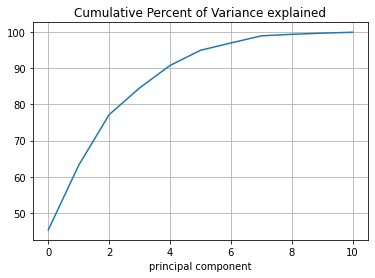

In [76]:
#percent of variance explained by each component

plt.plot(np.arange(pca.n_components_) ,np.cumsum(pca.explained_variance_ratio_)*100)
plt.grid(b=True)
plt.xlabel('principal component')
plt.title('Cumulative Percent of Variance explained')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Text(0.5, 1.0, 'Calinski Harabaz Scores')

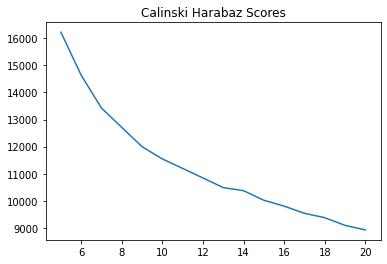

In [80]:
#scoring metric?
from sklearn.metrics import calinski_harabaz_score as ch_score
clusters = [5,6,7,9,10,11,12,13,14,15,16,17,18,19,20]
scores = []
inertias = []
for c in clusters:
    cl_n = KMeans(c).fit(results)
    score = ch_score(results, cl_n.labels_)
    scores.append(score)
    inertias.append(cl_n.inertia_)


plt.plot(clusters, scores)
plt.title('Calinski Harabaz Scores')

Text(0, 0.5, 'within cluster sum of squares')

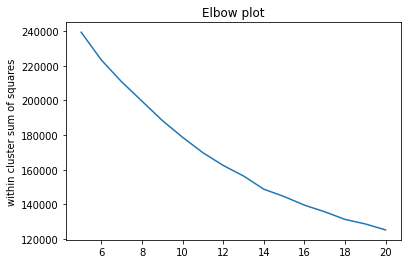

In [81]:
#elbow plot
plt.plot(clusters,inertias)
plt.title('Elbow plot')
plt.ylabel('within cluster sum of squares')

In [82]:
#optimal number of clusters is around 40
cl = KMeans(14)
cl.fit(results)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#outlier removal


def remove_outliers(results, cl, threshold):
    '''
    returns subset of results, and associated labels as a tuple
    takes results and a fit KMeans cluster object'''
    
    new_labels = []
    new_results = []
    
    
    #code for deciding what clusters to keep
    for i, center in enumerate(cl.cluster_centers_):
        within_cluster_results = results[cl.labels_==i]
        centroid = cl.cluster_centers_[i]
        #calc std vectors
        stdev = np.std(within_cluster_results, axis=0)
       
        keep = np.linalg.norm((centroid - within_cluster_results), axis=1) < threshold*np.linalg.norm(stdev)
        new_results.append(within_cluster_results[keep])
        #add labels?
        new_labels.extend([i for j in range(len(within_cluster_results[keep]))])
    return np.vstack(new_results), np.array(new_labels)


In [84]:
thresholds = np.linspace(.3,3, 20)

test = [remove_outliers(results, cl,t) for t in thresholds]

scores= []
for (res, labels) in test:
    
    score = ch_score(res, labels)
    scores.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Text(0.5, 1.0, 'Calinski Harabaz Scores as std threshold changes')

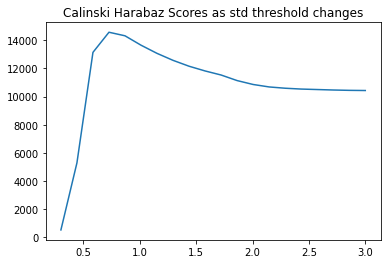

In [85]:
plt.plot(thresholds, scores)
plt.title('Calinski Harabaz Scores as std threshold changes')

In [0]:
#empirical best threshold 1 stdev
newresults, labels = remove_outliers(results, cl,0.9)


In [0]:

#subset results for tsne
max_size = len(results)
subset_results = []
lbls = []
for c in np.unique(cl.labels_):
    mask = (cl.labels_==c)
    c_size = np.sum(mask)
    if c_size < max_size:
        lbls.extend(list(cl.labels_[cl.labels_==c]))
        subset_results.append(results[mask])
lbls=np.array(lbls)
subset_results=np.vstack(subset_results)

In [88]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(subset_results)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.085s...
[t-SNE] Computed neighbors for 50000 samples in 10.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

For n_clusters = 14 The average silhouette_score is : 0.20743547770560275


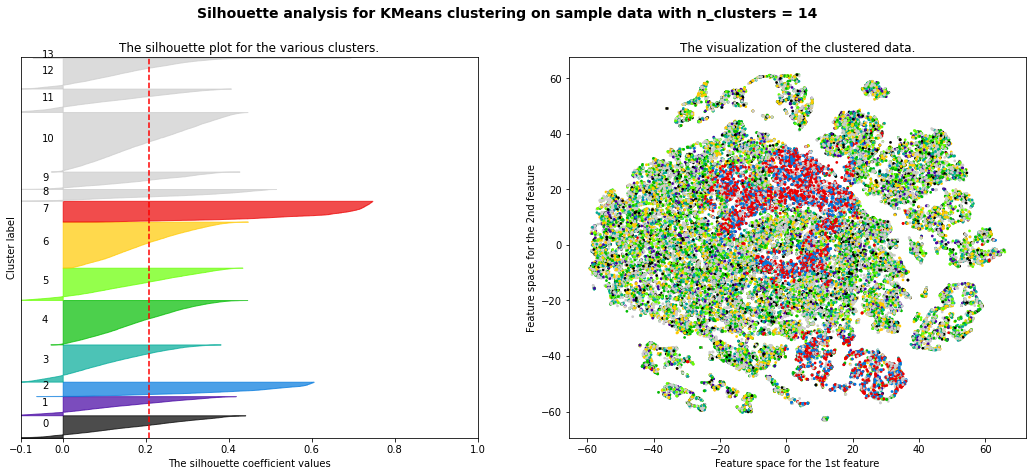

[0.20743547770560275]

In [93]:
X=results

range_n_clusters = [14]
silhouette_plotter(X, range_n_clusters,tsne_results)

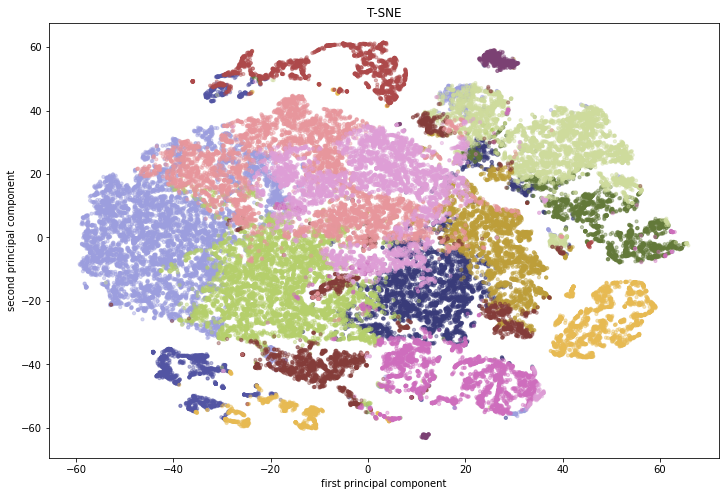

In [94]:
plt.figure(figsize=(12,8))

plt.scatter(tsne_results[:,0], tsne_results[:,1], s=10,c=lbls,cmap='tab20b', alpha=.4)


# leg = plt.legend()




# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

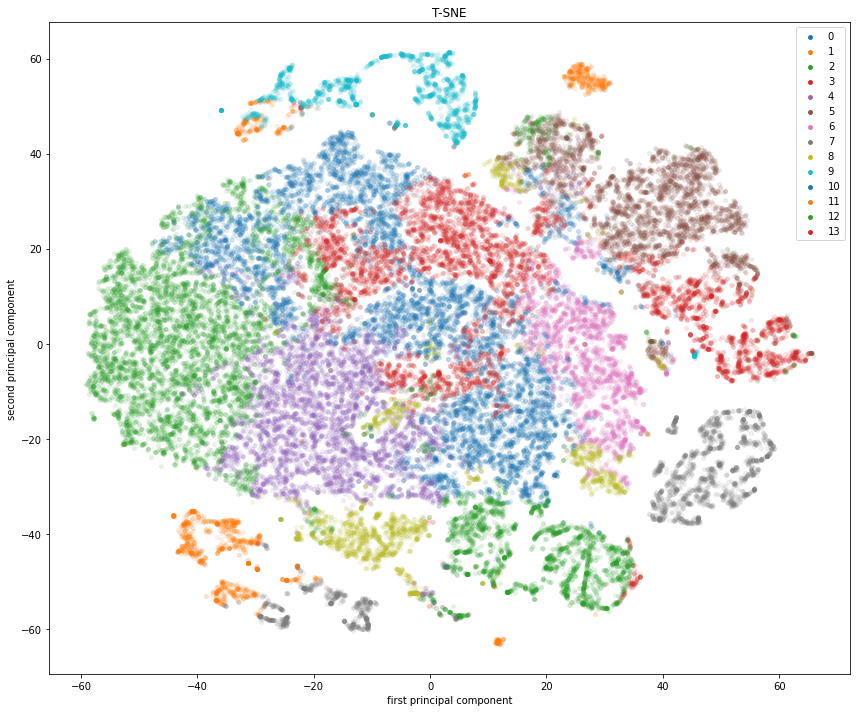

In [95]:
plt.figure(figsize=(12,10))
for c in np.unique(lbls):
    mask = lbls==c
    if np.sum(mask) <0:
        lbl = '_nolegend_'
    else:
        lbl = c
    plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=15,alpha=.1,label=lbl)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.tight_layout()

In [0]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# for c in np.unique(cl.labels_):
#     mask = cl.labels_==c
#     if np.sum(mask) <50:
#         lbl = '_nolegend_'
#     else:
#         lbl = c
#     ax.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], tsne_results[mask][:,2], s=10, alpha=.01,label=lbl)
# leg = plt.legend()
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
# ax.set_xlabel('first principal component')
# ax.set_ylabel('second principal component')
# ax.set_zlabel('third principal component')
# ax.view_init(elev=30, azim=0)
# plt.show()

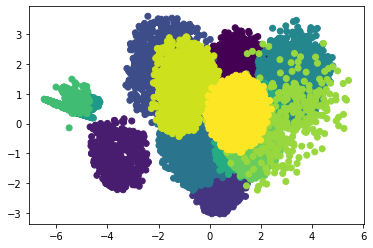

In [98]:
plt.scatter(newresults[:,0],newresults[:,1],c=labels)
# plt.xlim(0,10)
# plt.ylim(-10,10)

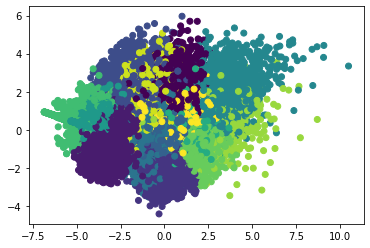

In [99]:
plt.scatter(results[:,0],results[:,1],c=cl.labels_)
# plt.xlim(-10,100)
# plt.ylim(-15,10)

In [0]:
# #recluster after changes
# cl = KMeans(20).fit(results)
newcl = KMeans(40).fit(newresults)


In [0]:
# %matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(results[:,0],results[:,1],results[:,2],c=cl.labels_)

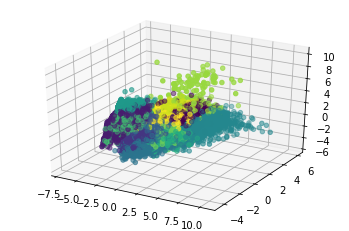

In [100]:
# plt.scatter(newresults[:,0],newresults[:,1],c=newcl.labels_)
# plt.xlim(-10,100)
# plt.ylim(-15,10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results[:,0],results[:,1],results[:,2],c=cl.labels_)

# ax.set_xlim3d(-10,10)
# ax.set_ylim3d(-15,10)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(newresults[:,0],newresults[:,1],newresults[:,2],c=newcl.labels_)

In [0]:
# # %matplotlib widget
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(newresults[:,0],newresults[:,1],newresults[:,2],c=newcl.labels_)
# # ax.set_xlim3d(-1,1)
# # ax.set_ylim3d(-3,3)
# # ax.view_init(elev=-0, azim=90)
# # for ii in range(10,360,10):
# #     ax.view_init(elev=10, azim=ii)
# #     fig.savefig("movie/movie{}.png".format(ii))

Points_with_labels = pd.DataFrame(data, columns = data.columns)
Points_with_labels['labels'] = cl.labels_
# #transform back to real numbers
# centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
# df_summary = pd.DataFrame(centroids, columns = data.columns)

In [101]:
c = cl.cluster_centers_
#transform back to real numbers
centroids = log.inverse_transform(scale.inverse_transform(pca.inverse_transform(c)))
df_summary = pd.DataFrame(centroids, columns = data.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:165: RuntimeWarning: overflow encountered in expm1
  return func(X, **(kw_args if kw_args else {}))


In [0]:
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes

In [103]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,no_of_in_transactions,tot_ether_recieved,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_out_txn_x,time_b/w_out_txn_y,active_months,monthly_out_txn,monthly_in_txn,cluster_size
2,9.872965,5.599506e+206,8.837709,7.583028e+256,2.995765e+16,1.458450e+20,1.586839e+83,1.630589e+70,11.944536,1.199466,1.204644,7763
4,10.590419,5.120064e+212,9.818407,1.767369e+268,3.628494e+16,3.245198e+20,1.097963e+58,1.095979e+53,5.942548,1.675175,1.701384,5957
10,16.101674,7.120081e+255,22.167292,inf,1.886556e+17,4.668626e+21,3.289904e+72,5.473566e+53,18.959827,1.813348,1.462179,5878
13,12.137775,8.674491e+186,38.280380,1.606634e+236,1.791273e+17,1.417296e+21,9.125732e+72,1.490364e+40,14.792078,2.600375,1.374199,4885
5,11.974214,1.430539e+214,9.286904,1.641660e+268,3.553992e+10,9.261795e+09,1.738659e+64,5.258886e+59,7.895948,1.439645,1.578293,4250
0,15.651541,2.465112e+221,28.098497,4.069659e+283,3.634395e+16,1.453268e+20,8.586180e+43,5.661250e+31,4.540474,2.938021,2.189002,3872
6,58.458505,5.095461e+280,65.123620,inf,1.581919e+17,1.537363e+21,3.964171e+45,4.428866e+34,23.486753,2.915572,2.416298,3071
12,11.869138,1.648728e+122,10.367487,2.605640e+67,3.862992e+16,4.740362e+20,1.028408e+43,1.749577e+39,3.441377,2.055834,2.046133,2938
7,1.016032,5.482920e+94,1.243865,7.292246e+25,6.342217e+15,2.546210e+19,7.112518e-01,2.161323e+03,1.115176,0.921292,0.769100,2737
8,57.058349,2.433691e+218,11.888073,2.917103e+269,3.898502e+15,1.778435e+18,4.167888e+47,8.883931e+60,26.231698,1.363470,2.272852,2454


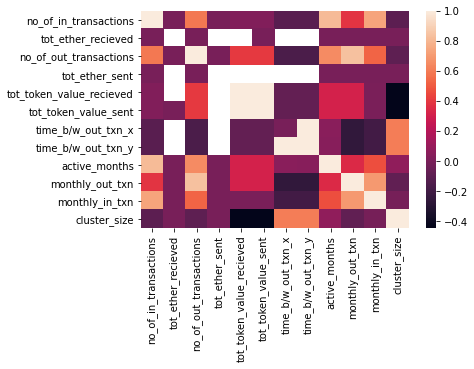

In [104]:
import seaborn as sns
sns.heatmap(df_summary.corr())

In [0]:
df_summary.drop(["tot_ether_sent"],axis=1)
arr = df_summary.drop(["tot_ether_sent"],axis=1).values

In [117]:
print(type(arr))
arr.shape

<class 'numpy.ndarray'>


(14, 11)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


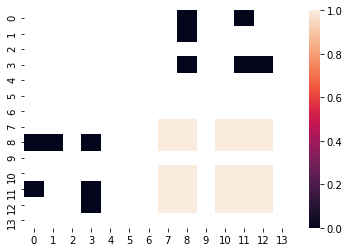

In [118]:
sns.heatmap(np.corrcoef(arr, rowvar=True))

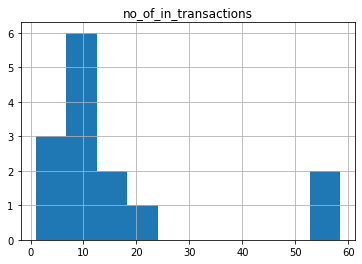

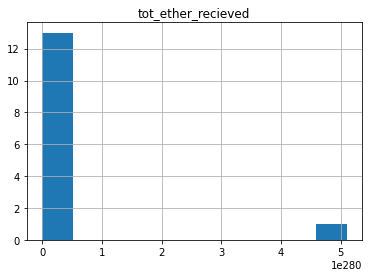

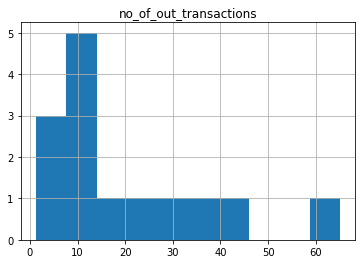

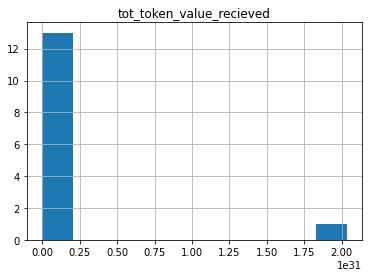

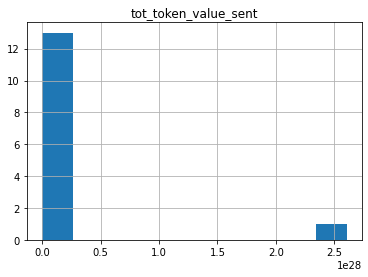

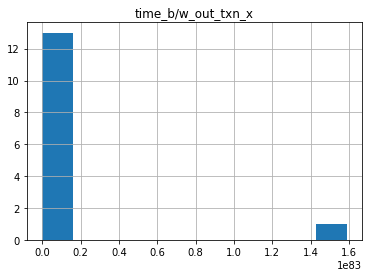

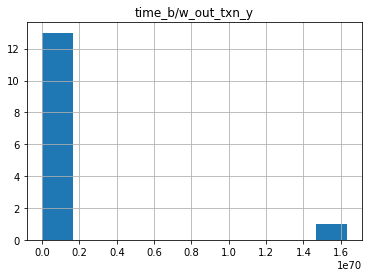

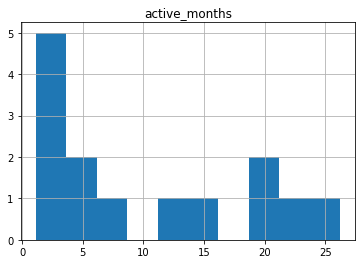

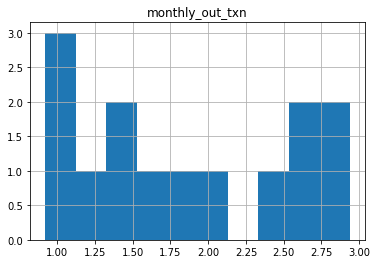

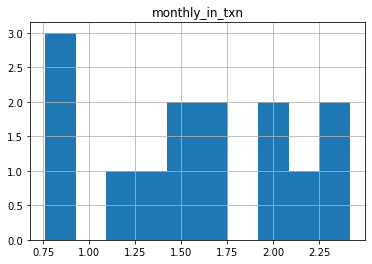

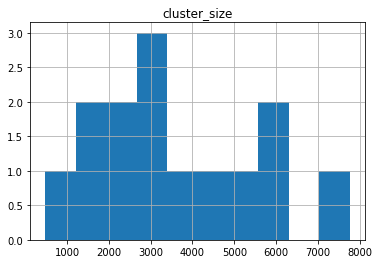

In [119]:
for col in df_summary.columns:
    if(col!="tot_ether_sent"):
      df_summary[col].hist()
      plt.title(col)
      plt.show()

In [0]:
p = PCA(n_components=3)

In [121]:
vectors = p.fit_transform(arr[:8,:])

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:454: RuntimeWarning: overflow encountered in square
  explained_variance_ = (S ** 2) / (n_samples - 1)
/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:456: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [0]:
xs = vectors[:,0]
ys = vectors[:,1]
zs = vectors[:,2]

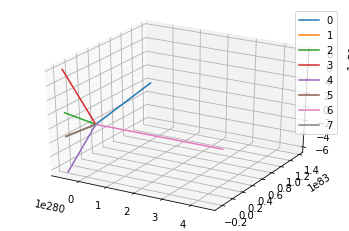

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,(x,y,z) in enumerate(zip(xs,ys,zs)):
    ax.plot([0,x], [0,y],[0,z], label=i)
plt.legend()

In [130]:
Points_with_labels.head()

,no_of_in_transactions,tot_ether_recieved,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_out_txn_x,time_b/w_out_txn_y,active_months,monthly_out_txn,monthly_in_txn,labels
0,9,27000000000000000,97,19448289831436946,9.393942e+06,9.393942e+06,1.156452e+05,1.434797e+04,2,48.500000,9.000000,3
1,14,10342497563429364,32,0,1.870353e+11,1.870353e+11,1.042143e+06,4.736983e+05,6,5.500000,2.500000,3
2,17,16776853680000000000,86,21009302000000000000,4.639691e+22,4.260856e+22,1.320557e+06,1.653896e+05,5,21.500000,3.400000,13
3,15,2100000000000000000,3,2099000000000000000,2.000000e+20,2.000000e+20,3.701651e+05,1.252319e+06,4,1.500000,5.000000,4
4,142,17850287239292549380,57,17813824239292549380,3.000000e+18,1.000000e+20,2.403451e+05,5.987940e+05,14,4.384615,10.923077,8


In [0]:
Points_with_labels(Points_with_labels.labels=1)